In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
## import data to python pandas
df=pd.read_csv("Mall_customers.csv")

In [26]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
df.sample(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
122,123,Female,40,69,58
152,153,Female,44,78,20
112,113,Female,38,64,42
196,197,Female,45,126,28
69,70,Female,32,48,47
6,7,Female,35,18,6
22,23,Female,46,25,5
71,72,Female,47,49,42
53,54,Male,59,43,60
14,15,Male,37,20,13


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
#Genre should be dummied

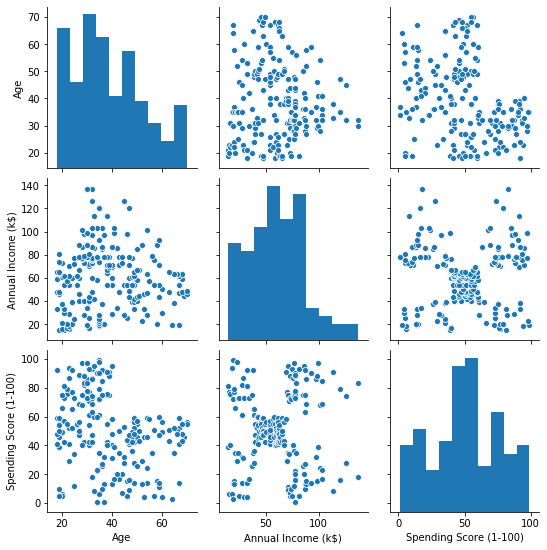

In [30]:
#drop column customerID because it is useless
sns.pairplot(df.drop(["CustomerID"], axis=1))

In [31]:
df.drop(["CustomerID"],axis=1).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


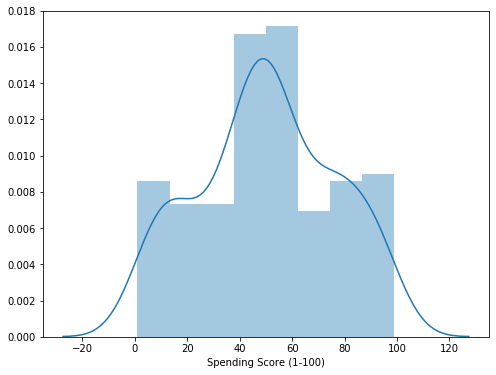

In [32]:
#plot distribution plot
fig=plt.figure(figsize=(8,6))
sns.distplot(df["Spending Score (1-100)"])

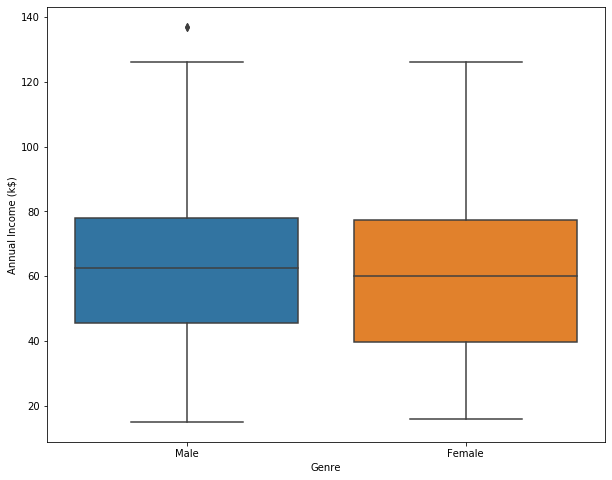

In [33]:
#which gender have more income
fig=plt.figure(figsize=(10,8))
sns.boxplot(x="Genre",y="Annual Income (k$)",data=df)

no significant difference in income between gender

# K-mean Clustering 

can read doc in sklearn.cluster.KMeans

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [34]:
#import K-mean
from sklearn.cluster import KMeans

In [35]:
#1st way to get only 2 columns
df[["Annual Income (k$)","Spending Score (1-100)"]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [36]:
#2nd way to get only 2 columns : datatype will be array
x=df.iloc[:,3:].values

In [37]:
#start with 2 clusters
kmeans=KMeans(n_clusters=2,random_state=99)

In [38]:
kmeans_label = kmeans.fit_predict(x)

In [39]:
kmeans_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [40]:
# coordinates of centroids
kmeans.cluster_centers_

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

we get the P1 and P2 of centriods

In [41]:
# sum of squared distance of samples (datatype : float)
kmeans.inertia_

181363.59595959596

In [42]:
# number of itetations run
kmeans.n_iter_

9

### How we choose x1,y1,x2,y2 for clustering visualization

In [43]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [48]:
x1=x[kmeans_label==0][:,0]
y1=x[kmeans_label==0][:,1]

In [49]:
x2=x[kmeans_label==1][:,0]
y2=x[kmeans_label==1][:,1]

### Clustering Visualization

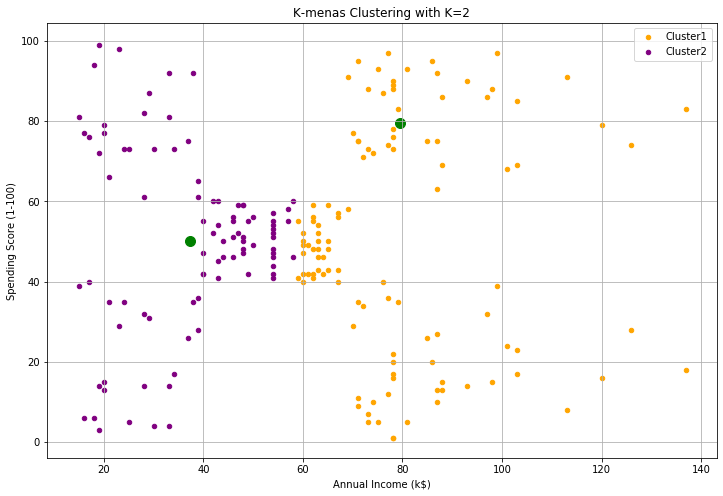

In [58]:
fig=plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='orange',label='Cluster1')
plt.scatter(x2,y2,s=20,c='purple',label='Cluster2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:1],s=100,c='green')
plt.title("K-menas Clustering with K=2")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid()

### Elbow Method

In [61]:
wcss=[]

for i in range (1,16):
    kmeans=KMeans(n_clusters=i,random_state=99)
    kmeans.fit(x)
    wcss.append (kmeans.inertia_)

In [62]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37455.984555160285,
 31573.960664122747,
 25329.474422215804,
 22206.986019376236,
 19746.911957660894,
 17910.039306438244,
 16219.643432089732,
 14292.543823365124,
 13120.300734791525,
 11696.848903289692]

### Elbow Method Visualization

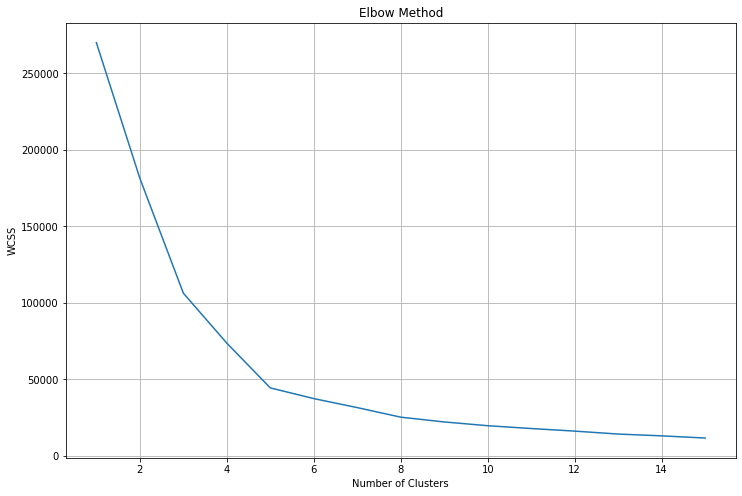

In [64]:
fig=plt.figure(figsize=(12,8))
plt.plot(range(1,16),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()

In [65]:
kmeans=KMeans(n_clusters=5, random_state=99)
kmeans_label=kmeans.fit_predict(x)

In [66]:
kmeans_label

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [73]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [74]:
kmeans.inertia_

44448.45544793371

In [75]:
kmeans.n_iter_

6

#### 5-cluster Visualization

In [76]:
x1=x[kmeans_label==0][:,0]
y1=x[kmeans_label==0][:,1]
x2=x[kmeans_label==1][:,0]
y2=x[kmeans_label==1][:,1]
x3=x[kmeans_label==2][:,0]
y3=x[kmeans_label==2][:,1]
x4=x[kmeans_label==3][:,0]
y4=x[kmeans_label==3][:,1]
x5=x[kmeans_label==4][:,0]
y5=x[kmeans_label==4][:,1]

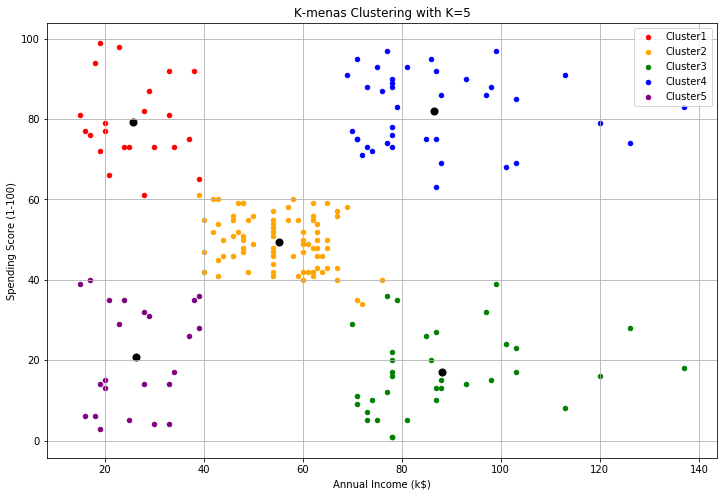

In [79]:
fig=plt.figure(figsize=(12,8))
plt.scatter(x1,y1,s=20,c='red',label='Cluster1')
plt.scatter(x2,y2,s=20,c='orange',label='Cluster2')
plt.scatter(x3,y3,s=20,c='green',label='Cluster3')
plt.scatter(x4,y4,s=20,c='blue',label='Cluster4')
plt.scatter(x5,y5,s=20,c='purple',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=50,c='black')
plt.title("K-menas Clustering with K=5")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid()